# Harmonic noise

In [1]:
%reset -f

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
import pickle as pkl
pi2 = np.pi*2
pi = np.pi

import sys
sys.path.append('../')
import harpy.harmonic_analysis as harpy

pkldir = '01_Output/HarmonicExc/'

In [3]:
from plot_configuration import *

# # Set style of plots
# colwidth=3.5
# figwidth=6
# figheight=4.5
# ticksize= 8 *figwidth/colwidth 
# labelsize=10 *figwidth/colwidth
# titlesize = 10 *figwidth/colwidth
# annotatesize= ticksize*1

# # mpl.style.use('classic')
# mpl.rcParams.update({'font.size':ticksize }) 
# mpl.rcParams.update({'legend.fontsize':ticksize })# legend
# mpl.rcParams.update({'ytick.labelsize':ticksize})
# mpl.rcParams.update({'xtick.labelsize':ticksize})
# mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
# mpl.rcParams.update({'axes.labelsize':labelsize})    # x,y,cbar labels
# mpl.rcParams.update({'figure.titlesize' :titlesize})
# mpl.rcParams.update({'savefig.bbox':'tight'})
# mpl.rcParams.update({'axes.formatter.limits':[-3,3]})
# mpl.rcParams.update({'figure.figsize':[6,5]})
# mpl.rcParams.update({'image.cmap':'rainbow'})
# mpl.rcParams.update({'axes.formatter.useoffset':True})   # no offset of axis
# # To be able to use SI units as micro (automatically upright)
# if 0:
#     params = {'text.usetex':True, 'text.latex.preamble': [r'\usepackage{siunitx}', r'\usepackage{cmbright}']}
#     mpl.rcParams.update(params)
# else:
#     mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4  (NOT IF USING TEX)
# mpl.rc('font', family = 'sans-serif')



# # mpl.rcParams.update({'mathtext.fontset':'cm'})
# # mpl.rcParams.update({'font.style':'normal'})
# # mpl.rcParams['mathtext.fontset'] = 'custom'
# # mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# # mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# # mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# # To get sans-serif
# # mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})

# # To use unicode
# # params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
# # params = {'text.usetex': True , 'mathtext.fontset': 'stixsans'}
# # plt.rcParams.update(params)

Finished configuring the plots.


# Many kicks


<IPython.core.display.Javascript object>


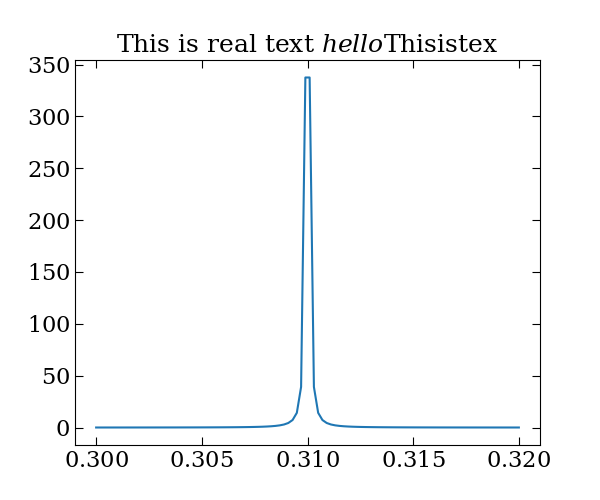

Text(0.5, 1.0, 'This is real text $hello \\mathrm{This is tex}$')

In [4]:
mu = np.linspace(0.3,0.32,100)*pi2
k = 1
g = .001
muk = 0.31 * pi2
tau = 2/g
tau =7000
f = k**2/tau / (1/tau**2 + (muk-mu)**2)
plt.figure()
plt.plot(mu/pi2,f)
# plt.xlabel(r'\textbf{time} (s) - $\si{\micro\volt}$')
plt.title(r'This is real text $hello \mathrm{This is tex}$')

In [6]:
## Beam and machine parameters
a = 5e-3
q0 = 0.31
epsh = 1e-4 * 100
epsh = abs(a)*2e-0
epsw= 1e-4 * 0
Jn = 2
qn =  ( q0 + Jn*a )
tmax = 50000
turns = np.arange(tmax)

aa=abs(a)
tau_min = pi2/np.sqrt(np.sqrt(2*Jn)*epsh*aa*pi)
tau_eff = pi2/np.sqrt(np.sqrt(2*Jn)*epsh*aa)
Wh_eff =  np.sqrt(np.sqrt(2*Jn)*epsh/aa)/2
Wh_eff2 =  np.sqrt(np.sqrt(2*Jn)*epsh/(pi*aa))
dWh_min_dphi = 1/(tau_min*aa)



def rotate(x,p,mu):
    temp = x
    x = np.cos(mu)*x   +np.sin(mu)*p
    p =-np.sin(mu)*temp+np.cos(mu)*p
    return x,p

def nsin(t):
    return  np.cos(pi2*qn*(t+1) + 0. * np.pi)


# dj = 10-3

# t = 1/(2*a*dj)
# m = np.sqrt(10/2)*epsh/ (np.pi*a*dj)

# print(t,m)
np.random.randn(3)
print('tau_min',tau_min)
print('tau_eff',tau_eff)
print('Wh_eff',Wh_eff2)
print('dWdphi',dWh_min_dphi)

tau_min 354.4907701811032
tau_eff 628.3185307179587
Wh_eff 1.1283791670955126
dWdphi 0.5641895835477563


In [7]:
## Distribution
dist = 2
if dist ==1:
    N = 20
    x =+np.linspace(-5 *0,1*5 ,N)
    x[x==0]=1e-1
    p = np.zeros_like(x)
    phis = np.zeros_like(x)
elif dist ==2 :
    N = 201
    phis = np.linspace(-pi,1*np.pi,N+2,endpoint=True)[1:-1]+0.35*0
    phis = np.linspace(-pi,1*np.pi,N,endpoint=True)
    J = Jn
    R = np.sqrt(2*J)
    x = R * np.cos(phis)
    p = -R * np.sin(phis)    
elif dist ==3:
    NJ = 51
    Nphi=20
    N = NJ*Nphi
    J1d = np.linspace(0,2,NJ)
    phi1d= np.linspace(0,2*np.pi,Nphi,endpoint=False)
    J0,phis = np.meshgrid(J1d,phi1d)
    J=J0.reshape(N,) ; phis=phis.reshape(N,)
    R = np.sqrt(2*J)
    x = R * np.cos(phis)
    p = R * np.sin(phis)    

Js = .5*(x**2+p**2)
mu0 = np.pi*2*(q0+a*Js)

## Simulation
if dist<=3:
    save = np.zeros((2,tmax,N))
else:
    save = np.zeros((2,tmax,Ns[0],Ns[1]))
for t in turns:
    mu = np.pi*2*(q0+a*(x**2+p**2)*.5)
    x,p = rotate(x,p,mu)
    
    if epsh >0: p+= epsh*nsin(t)
    if epsw >0: p+= np.random.normal(0,1,N)*epsw
    save[:,t] = [x,p]
    

In [8]:
# Postprocess

J = .5*(save[0]**2 + save[1]**2)

phi = np.arctan2(-save[1],save[0]) 
ind = np.diff(phi,axis=0)<0.1*pi2
phi[1:,:]+=np.cumsum(pi2*ind,axis=0)
phimin = phi - pi2*qn*turns[:,np.newaxis]
phiminc =phimin-np.mean(phimin,axis=0)
phimin0 = phimin - phimin[0,:]
indpeak = np.argmax(J,axis=0)
phiminp = phimin - phimin[indpeak,np.arange(N)]

period = np.zeros(N)
Joff = J-Jn
# plt.figure()
for n in range(N):
    
#     fft = np.abs(np.fft.rfft(Joff,axis=0))
#     freq = np.fft.rfftfreq(n=tmax)
#     fft[:3,:]=0
#     maxf = freq[np.argmax(fft,axis=0)]
#     print(maxf)
    
    
    
    harmonic = harpy.HarmonicAnalysis(Joff[:,n])
#     plt.plot(Joff[n])
    Q,amp = harmonic.laskar_method(6)
#     print(Q,amp, Q[0])
    Q = np.array(Q)
    Q = Q[np.logical_and(Q>0.,Q<0.5)]
#     Q = Q[Q>0]
    
    maxf = Q[0]
    period[n] = 1/maxf
    

# Store output
filename = pkldir + 'harmonic_Jh%.1e_Ph%.1e_a%.1e.pkl'%(Jn,epsh,a)
with open(filename,'wb') as pklfile:
    pkl.dump([J,phis,phiminp,period,tau_min,dWh_min_dphi,Wh_eff2],pklfile)

<IPython.core.display.Javascript object>


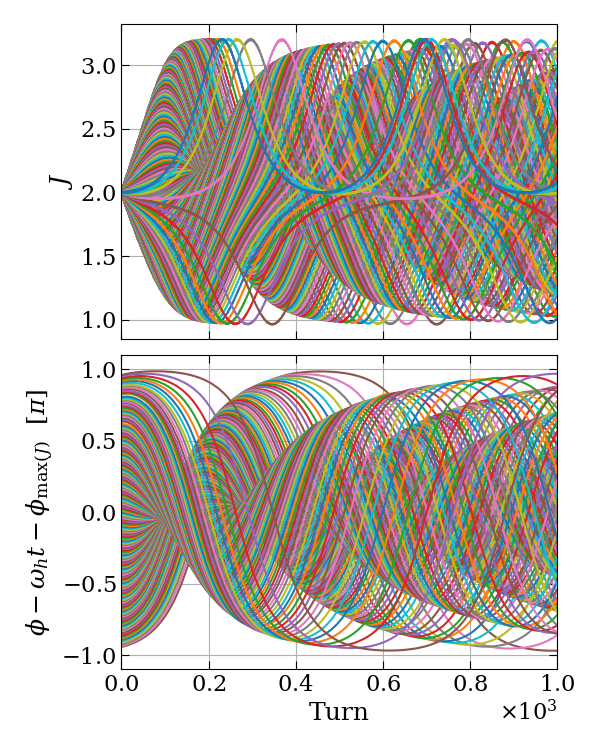

<IPython.core.display.Javascript object>


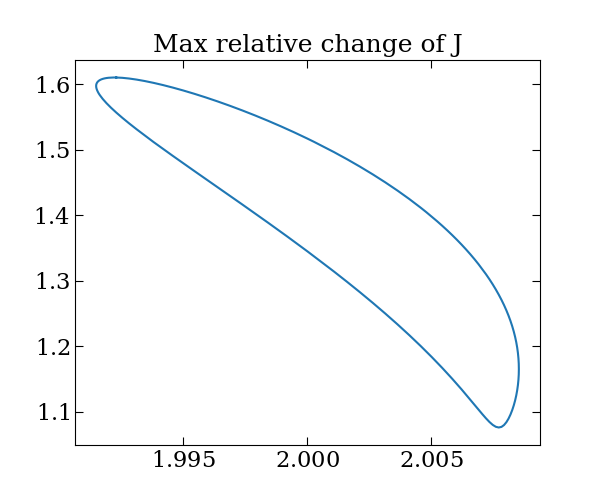

<IPython.core.display.Javascript object>


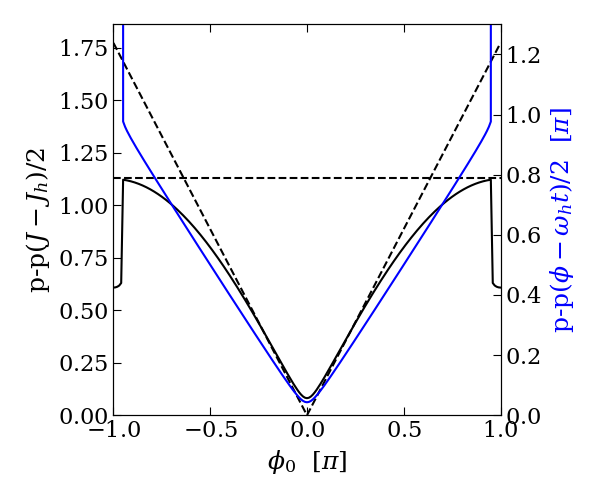

<IPython.core.display.Javascript object>


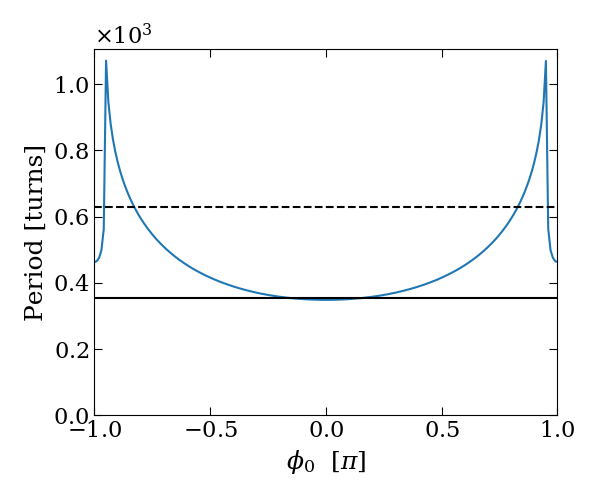

In [9]:
# plt.plot(save[0],save[1])


# plt.gca().set_color_cycle([cm.jet(i) for i in J[0]/np.max(J[0])])
# plt.plot(turns,(J-J[0]*0))
# plt.plot([0,0],[0,1])
# plt.plot(turns,(J-(qn-q0)/a))
# plt.ylabel(r'$J-J_n$')
# plt.show()
# print('Predicted time = %.2e'%(5*R**2/epsw**2))

# plt.figure(2)
# plt.plot(turns,J)

# plt.figure()
# plt.plot(turns,phiminp/np.pi)


fig,axs=plt.subplots(2,1,sharex=True,figsize=(figwidth,figheight*1.5))
axs[0].plot(turns,J)
axs[1].plot(turns,phiminp/np.pi)
for ax in axs:
    ax.grid(True)
axs[0].set_ylabel(r'$J$')
axs[1].set_ylabel(r'$\phi-\omega_h t- \phi_{\mathrm{max}(J)}$  $[\pi]$')
axs[1].set_xlabel('Turn')
axs[1].set_ylim(-1.1,1.1)
axs[0].set_xlim(0,1e3)
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

if dist<3 and 1:
    plt.figure()
    plt.plot(J[0],np.max(np.abs(J-J[0]*0),axis=0)/J[0])
    plt.title('Max relative change of J')

    
    
    plt.figure()
    ax1 = plt.gca()
#     ax1.plot(phis/np.pi,np.max(np.abs(J-J[0])/1+0*J[0],axis=0),'k--',label='half spread')
    ax1.plot(phis/np.pi,(np.max(J,axis=0)-np.min(J,axis=0))/2,'k',label='full spread')
    ax1.plot(phis/np.pi,np.abs(phis)*dWh_min_dphi,'k--')
#     plt.plot(phis/np.pi,.4*np.cos(phis/2)**2,label=r'$cos^2$')
    ax1.set_ylabel(r'p-p$(J-J_h)/2$')
    ax1.axhline(Wh_eff2,color='k',ls='--')
#     ax1.axhline(Wh_eff*np.sqrt(4/pi),color='k',ls='-.')
    ax1.set_ylim(bottom=0)
    ax2 = ax1.twinx()
    ax2.plot(phis/np.pi,(np.max(phiminp,axis=0)-np.min(phiminp,axis=0))/pi2,'b')
    ax2.set_ylabel(r'p-p$(\phi-\omega_h t)/2$  $[\pi]$',color='b')
    ax2.set_ylim(0,1.3)

#     ax1.legend(loc=0)
#     plt.title('Max change as function of phase')
    ax1.set_xlabel(r'$\phi_0$  $[\pi]$')
    ax1.set_xlim(-1,1)
    plt.tight_layout()

    plt.figure()
    plt.xlabel(r'$\phi_0$  $[\pi]$')
    plt.ylabel('Period [turns]')
    plt.plot(phis/pi,period)
    plt.axhline(tau_min,c='k')
    plt.axhline(tau_eff,c='k',ls='--')
    plt.xlim(-1,1)
    plt.ylim(bottom=0)
    plt.tight_layout()
    
if dist==3:
    J2D = J.reshape(tmax,Nphi,NJ)
    
    # Action
    plt.figure()
    plt.xlabel('J')
    plt.title('Oscillation Amplitude')
    spread = (np.max(J2D,axis=0)-np.min(J2D,axis=0))*.5
    print(J1d.shape,spread.shape)
    plt.plot(J1d,np.mean(spread,axis=0))
    plt.plot(J1d, epsh/np.sqrt((2*np.pi*a)**2*(J1d**2-Jn**2)**2)*10 )
    
    plt.figure()
    plt.title('D')
    plt.xlabel('J')
    spread = (np.max(J2D,axis=0)-np.min(J2D,axis=0))*.5
#     spread = np.max(np.abs(J2D-J2D[0]),axis=0)*1
    spread = (J2D[-1]-J2D[0])
    print(J0.shape,spread.shape)
#     plt.plot(J0,spread**2/2)
    plt.plot(J1d,np.mean(spread**2/2,axis=0))
    
    wJ = np.sqrt(epsh*np.sqrt(Jn)/a)/1.5 /2
    Dharmt = epsh**1.5*J1d**.75/a**.5 *3/8   / [np.sqrt(1+((J1d**2-3**2)/wJ)**2), 
                                                1+((J1d-Jn)/wJ)**4,
                                                1+((J1d**2-Jn**2)/wJ**2)**2,
                                                1/np.max([1-((J1d-Jn)/(wJ*2))**2,np.zeros(NJ)],axis=0)][3]
    Dharm0 = J1d/8 *epsh**2/a / np.abs(J1d-Jn) *0
    Dharm0[np.abs(J1d-Jn)<.5]=0
    Dwhite = J1d*epsw**2/2   
    
#     print(amp)
    plt.plot(J1d, (Dharmt + Dwhite +Dharm0 )*tmax )
    
    
    plt.figure()
    plt.title('U')
    plt.xlabel('J')
    plt.plot(J1d,np.mean(spread,axis=0))
    # per step
#     steps = np.diff(J2D,axis=0).reshape(((tmax-1)*N,1))
#     plt.hist(J2D[:-1].reshape((tmax-1)*N),weights=steps)

#     plt.figure()
#     plt.plot(turns,Js[:,-1,:])

<IPython.core.display.Javascript object>


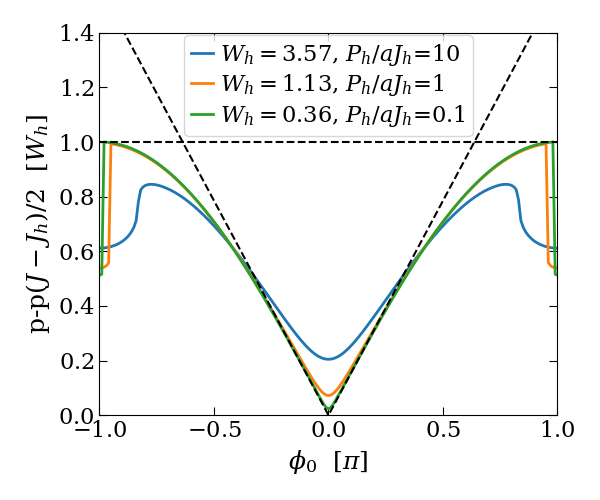

<IPython.core.display.Javascript object>


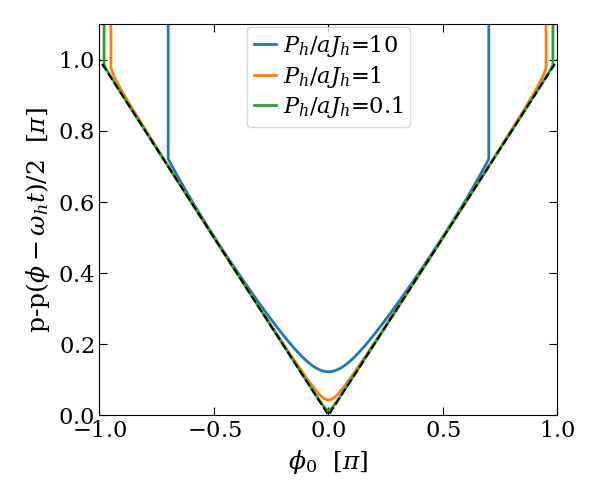

<IPython.core.display.Javascript object>


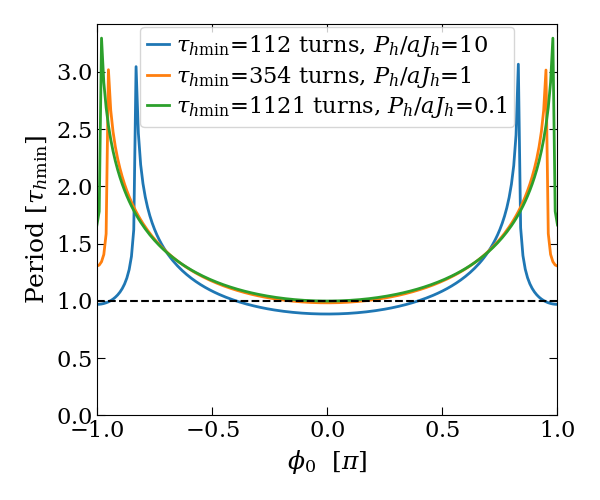

In [12]:
# Pretty plot
import os

flag_twinx = False
flag_2in1 = False

if not flag_2in1: 
    fig1 = plt.figure()
    ax1 = plt.gca()
else:
    fig1 = plt.figure(figsize=(figwidth,figheight*1.5))
    ax1=fig1.add_subplot(211)

if flag_twinx:
    ax2 = ax1.twinx()
else:
    fig2 = plt.figure()
    ax2 = fig2.gca()

if not flag_2in1:
    fig3 = plt.figure()
    ax3 = plt.gca()
else:
    fig3 = fig1
    ax3 = fig3.add_subplot(212,sharex=ax1)


for i in range(3):
    iJh = 2
    ia = 5e-3
    iPh = ia*iJh*10**(1-i)
    i+=0
#     iPh = [1e-4,1e-3,1e-2,1e-1,1e-2][i]
#     ia = [5e-3,5e-4][i==4]
    lw=2
    filename = pkldir+'harmonic_Jh%.1e_Ph%.1e_a%.1e.pkl'%(iJh,iPh,ia)
    if not os.path.exists(filename):
        print('Cant find ',filename)
        continue
    with open(filename,'rb') as pklfile:
        [J,phis,phiminp,period,tau_min,dWh_min_dphi,Wh_eff2] = pkl.load(pklfile)
        
    Wh_unit = Wh_eff2 # dWh_min_dphi*np.pi
    label = r'$P_h/aJ_h$=%s'%short_float(iPh/ia/iJh)
    label2  = r'$W_h=%.2f$, '%(Wh_eff2)
    ax1.plot(phis/np.pi,(np.max(J,axis=0)-np.min(J,axis=0))/2/Wh_unit,lw=lw,c=colors[i],label=label2+label)#'full spread')
    
    
#     if flag_twinx:
    ax2.plot(phis/np.pi,(np.max(phiminp,axis=0)-np.min(phiminp,axis=0))/pi2,lw=lw,c=colors[i],label=label)
        
    label2 = r'$\tau_{h\min}$=%s turns, '%sci_not(tau_min,1)
    label2 = r'$\tau_{h\min}$=$%.0f$ turns, '%tau_min#sci_not(tau_min,1)
    ax3.plot(phis/pi,period/tau_min,lw=lw,c=colors[i],label=label2+label)
    
    
ax1.set_ylabel(r'p-p$(J-J_h)/2$  $[W_{h}]$') # \mathrm{min} (\pi)
ax1.axhline(Wh_eff2/Wh_unit,color='k',ls='--',zorder=5)
ax1.plot(phis/np.pi,np.abs(phis)*dWh_min_dphi/Wh_unit,'k--',zorder=5)
#     ax1.axhline(Wh_eff*np.sqrt(4/pi),color='k',ls='-.')
ax1.set_ylim(bottom=0,top=1.4)

if not flag_2in1:
    ax1.set_xlabel(r'$\phi_0$  $[\pi]$')
    ax1.set_xlim(-1,1)


ax2.set_ylabel(r'p-p$(\phi-\omega_h t)/2$  $[\pi]$',color=['k','b'][flag_twinx])
ax2.set_ylim(0,1.1)
if not flag_twinx:
    ax2.set_xlabel(r'$\phi_0$  $[\pi]$')
    ax2.plot([-pi,0,pi],[pi,0,pi],'k--')
    ax2.set_xlim(-1,1)
    ax2.legend(loc=0)
    fig2.tight_layout()
ax1.legend(loc=0,)
fig1.tight_layout()

ax3.set_xlabel(r'$\phi_0$  $[\pi]$')
ax3.set_ylabel(r'Period $[\tau_{h\mathrm{min}}]$')
ax3.axhline(1,c='k',ls='--')
# ax3.axhline(tau_eff,c='k',ls='--')
ax3.set_xlim(-1,1)
ax3.set_ylim(bottom=0)
ax3.legend(loc=0)
fig3.tight_layout()

if flag_2in1:
    ax1.set_yticks(np.arange(0,1.6,0.2))
    ax1.tick_params(axis='x',labelbottom='off')
    fig1.subplots_adjust(hspace=0.05)
    fig1.savefig('03_Plots/harmonicExcitation_app.eps')
else:
    fig1.savefig('04_PlotsHarm/harmEx_ppJ.eps')
    fig3.savefig('04_PlotsHarm/harmEx_period.eps')

# Old

In [121]:

# plt.figure()
# x = np.arange(1000)
# y = np.random.randn(1000)
# # plt.gca().set_color_cycle([cm.jet(i) for i in J[0]/np.max(J[0])])
# # plt.plot(turns,(J-J[0]*0))
# plt.plot(x) 
# # plt.show()

[3200 3200 3200 3201 3200 3201 3199 3199 3199 3200 3199 3199 3199 3199
 3199 3199 3200 3199 3199 3199 3199 3199 3200 3199 3199 3199 3200 3199
 3222 3201]
(array([   0,    0,    0, ..., 9998, 9998, 9998]), array([ 0,  1,  2, ..., 16, 22, 26]))
(5001, 30)


<IPython.core.display.Javascript object>


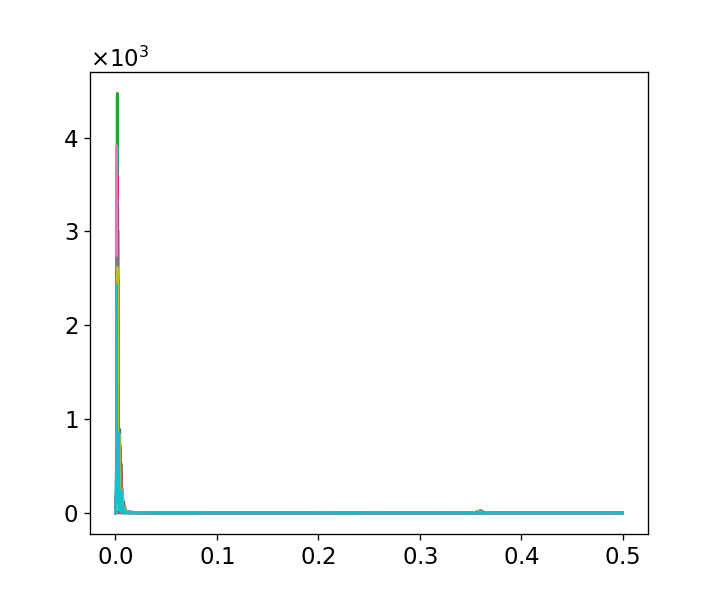

[0.000e+00 1.000e-04 2.000e-04 ... 4.998e-01 4.999e-01 5.000e-01] [15 17 19 21 22 24 25 26 27 27 28 28 29 29 29 28 28 27 27 26 25 23 22 20
 19 17 14 10 22 11]


In [203]:
# ind = np.diff(phi,axis=0)<0
# print(np.shape(ind))
# print(ind)
# print(phi[:10,0])
# print(np.diff(phi[:11,0]))
# print(np.cumsum(1*(np.diff(phi[:11,0])<0)))
# print(indpeak,phimin[indpeak])
# print(np.shape(ind),ind[0][54])
print(np.sum(ind,axis=0))
print((np.nonzero(ind)))
print(np.shape(fft))
plt.figure()
plt.plot(freq,np.abs(fft))
print(freq,np.argmax(fft,axis=0))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  5  7  8  8
 10  6  9  8  7  6  5  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


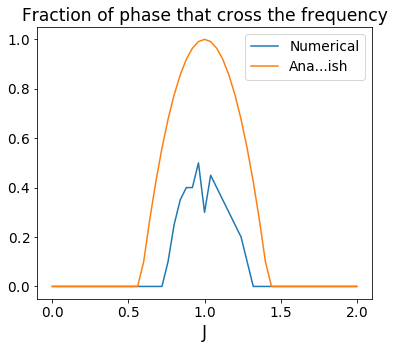

In [24]:
    plt.figure()
    plt.title('Fraction of phase that cross the frequency')
    plt.xlabel('J')
    below = J1d<Jn
    above = J1d>=Jn
    crosscount=np.sum(np.logical_and(np.any(J2D>Jn,axis=0),np.any(J2D<Jn,axis=0)),axis=0)
    print(crosscount)
    plt.plot(J1d,crosscount/Nphi,label='Numerical')
    plt.plot(J1d,[1/np.sqrt(1+((J1d**2-Jn**2)/wJ)**2), 
                  1/(1+(np.abs(J1d-Jn)/wJ)**3),
                  1/(1+((J1d**2-Jn**2)/wJ**0)**2),
                  np.max([1-((J1d-Jn)/(wJ*2))**2,np.zeros(NJ)],axis=0)][3],label='Ana...ish')
    plt.legend(loc=0)
        

In [523]:
np.max([[1,-2,3],np.zeros(3)],axis=0)

array([1., 0., 3.])